In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import seaborn as sns
import copy

In [2]:
temp = pd.read_csv('total.csv', low_memory = False)
temp

,year,location_code,gu_name,estate_change_rate,home_env_rate,economy_env_rate,social_env_rate,dong_name,estate_type,cost
0,2020,1.12901E+18,성북구,0.255000,6.45,5.23,6.06,장위동,아파트,749000000
1,2020,1.12901E+18,성북구,0.255000,6.45,5.23,6.06,길음동,아파트,1200000000
2,2020,1.15301E+18,구로구,0.298333,6.59,5.54,5.93,구로동,아파트,105000000
3,2020,1.11701E+18,용산구,0.219167,6.41,5.34,5.94,산천동,아파트,830000000
4,2020,1.11701E+18,용산구,0.219167,6.41,5.34,5.94,이촌동,아파트,735000000
...,...,...,...,...,...,...,...,...,...,...
869204,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,고척동,아파트,273000000
869205,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,신도림동,아파트,398000000
869206,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,구로동,오피스텔,118000000
869207,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,구로동,연립주택,198000000


In [3]:
gu = temp["gu_name"]
gu = set(gu)

In [4]:
gu = list(gu)
gu.sort()
gu

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [17]:
estate = temp["estate_change_rate"]
home = temp["home_env_rate"]
economy = temp["economy_env_rate"]
social = temp["social_env_rate"]
cost = temp["cost"]

## 지가 변동률

In [29]:
estate_val = []
estate_knn = []
for name in gu:
    val = temp[temp["gu_name"] == name]
    val = val["estate_change_rate"].iloc[0]
    estate_val.append(val)
    estate_knn.append([val, 0])

In [32]:
# 군집의 갯수 5
kmean_estate = KMeans(n_clusters=5)
kmean_estate.fit(estate_knn)

KMeans(n_clusters=5)

In [36]:
# 군집의 중심 좌표
center_estate = kmean_estate.cluster_centers_
lable_estate = kmean_estate.labels_
print(center_estate)

[[0.29125    0.        ]
 [0.07944444 0.        ]
 [0.20383333 0.        ]
 [0.3875     0.        ]
 [0.25309524 0.        ]]


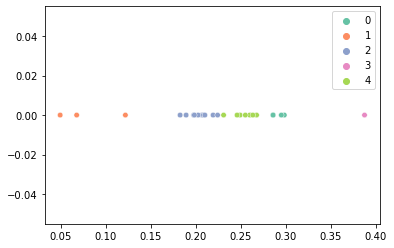

In [40]:
sns.scatterplot(x= estate_val, y = [0 for _ in range(len(estate_val))], hue = lable_estate, s = 30, palette="Set2");

In [86]:
cnt = 0
ground = []
for name in gu:
#     print("%s는 %f 포인트로 :: %d 티어" %(name, estate_val[cnt], lable_estate[cnt]))
    
    if lable_estate[cnt] == 2:
        num = 2
    elif lable_estate[cnt] == 4:
        num = 3
    elif lable_estate[cnt] == 0:
        num = 4
    elif lable_estate[cnt] == 3:
        num = 5
    else:
        num = 1
    
    ground.append([name, estate_val[cnt], num])
    cnt += 1

In [87]:
ground

[['강남구', 0.049166667000000004, 1],
 ['성동구', 0.24916666699999998, 3],
 ['관악구', 0.24583333300000001, 3],
 ['도봉구', 0.26, 3],
 ['송파구', 0.12166666699999999, 1],
 ['구로구', 0.29833333300000003, 4],
 ['마포구', 0.285833333, 4],
 ['성북구', 0.255, 3],
 ['영등포구', 0.2675, 3],
 ['강동구', 0.1975, 2],
 ['강북구', 0.285833333, 4],
 ['강서구', 0.206666667, 2],
 ['노원구', 0.3875, 5],
 ['양천구', 0.230833333, 3],
 ['용산구', 0.21916666699999998, 2],
 ['서대문구', 0.208333333, 2],
 ['종로구', 0.1825, 2],
 ['금천구', 0.21, 2],
 ['은평구', 0.2025, 2],
 ['중랑구', 0.263333333, 3],
 ['서초구', 0.0675, 1],
 ['광진구', 0.224166667, 2],
 ['동작구', 0.198333333, 2],
 ['중구', 0.18916666699999998, 2],
 ['동대문구', 0.295, 4]]

In [88]:
ground = pd.DataFrame(ground, columns=["gu", "change_rate", "jip-gap-change tier"])
ground.to_csv("지가변동률티어.csv")

## 만족도

In [44]:
temp

,year,location_code,gu_name,estate_change_rate,home_env_rate,economy_env_rate,social_env_rate,dong_name,estate_type,cost
0,2020,1.12901E+18,성북구,0.255000,6.45,5.23,6.06,장위동,아파트,749000000
1,2020,1.12901E+18,성북구,0.255000,6.45,5.23,6.06,길음동,아파트,1200000000
2,2020,1.15301E+18,구로구,0.298333,6.59,5.54,5.93,구로동,아파트,105000000
3,2020,1.11701E+18,용산구,0.219167,6.41,5.34,5.94,산천동,아파트,830000000
4,2020,1.11701E+18,용산구,0.219167,6.41,5.34,5.94,이촌동,아파트,735000000
...,...,...,...,...,...,...,...,...,...,...
869204,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,고척동,아파트,273000000
869205,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,신도림동,아파트,398000000
869206,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,구로동,오피스텔,118000000
869207,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,구로동,연립주택,198000000


In [53]:
happy_val = []
happy_knn = []
for name in gu:
    val = temp[temp["gu_name"] == name]
    val_1 = val["home_env_rate"].mean()
    val_2 = val["economy_env_rate"].mean()
    val_3 = val["social_env_rate"].mean()
    result = (val_1 + val_2 + val_3) / 3
    happy_val.append(result)
    happy_knn.append([result, 0])

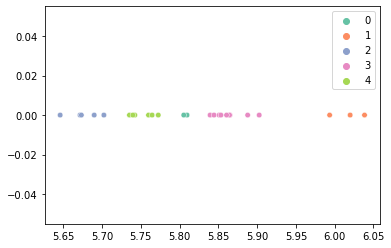

In [54]:
# 군집의 갯수 5
kmean_happy = KMeans(n_clusters=5)
kmean_happy.fit(happy_knn)

# 군집의 중심 좌표
center_happy = kmean_happy.cluster_centers_
lable_happy = kmean_happy.labels_

sns.scatterplot(x= happy_val, y = [0 for _ in range(len(happy_val))], hue = lable_happy, s = 30, palette="Set2");

In [76]:
cnt = 0
happy = []
for name in gu:
#     print("%s는 %f 포인트로 :: %d번 군집" %(name, happy_val[cnt], lable_happy[cnt]))
    if lable_happy[cnt] == 3:
        num = 2
    elif lable_happy[cnt] == 0:
        num = 3
    elif lable_happy[cnt] == 4:
        num = 4
    elif lable_happy[cnt] == 2:
        num = 5
    else:
        num = 1
    
    happy.append([name, happy_val[cnt], num])
    cnt += 1

In [84]:
happy = pd.DataFrame(happy, columns=["gu", "happy point", "happy tier"])
happy.to_csv("만족도티어.csv")

## 지하철역

In [61]:
sub_info = {"노원구":18,
"도봉구": 13,
"강북구": 12,
"중랑구": 11,
"성북구": 22,
"동대문구": 14,
"광진구": 14,
"강동구": 15,
"송파구": 28,
"성동구": 15,
"강남구": 17,
"중구": 15,
"종로구": 16,
"은평구": 11,
"서대문구": 15,
"용산구": 15,
"서초구": 18,
'마포구': 18,
"관악구": 18,
"양천구": 20,
"강서구": 20,
"동작구": 15,
"영등포구": 15,
"구로구": 17,
"금천구": 12}

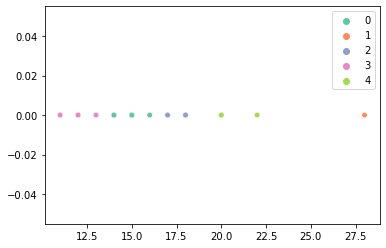

In [67]:
sub_val = []
sub_knn = []
for name in gu:
    val = sub_info[name]
    sub_val.append(val)
    sub_knn.append([val, 0])
    
# 군집의 갯수 5
kmean_sub = KMeans(n_clusters=5)
kmean_sub.fit(sub_knn)

# 군집의 중심 좌표
center_sub = kmean_sub.cluster_centers_
lable_sub = kmean_sub.labels_

sns.scatterplot(x= sub_val, y = [0 for _ in range(len(sub_val))], hue = lable_sub, s = 30, palette="Set2");

In [74]:
cnt = 0
gogo = []
for name in gu:
#     print("%s는 %d개로 :: %d번 군집" %(name, sub_val[cnt], lable_sub[cnt]))
    if lable_sub[cnt] == 4:
        num = 2
    elif lable_sub[cnt] == 2:
        num = 3
    elif lable_sub[cnt] == 0:
        num = 4
    elif lable_sub[cnt] == 3:
        num = 5
    else:
        num = 1
    gogo.append([name, sub_val[cnt], num])
    cnt += 1

In [89]:
gogo = pd.DataFrame(gogo, columns=["gu", "구내 지하철 개수", "교통 티어"])
gogo.to_csv("만족도티어.csv")

## 집 값 티어

In [90]:
temp

,year,location_code,gu_name,estate_change_rate,home_env_rate,economy_env_rate,social_env_rate,dong_name,estate_type,cost
0,2020,1.12901E+18,성북구,0.255000,6.45,5.23,6.06,장위동,아파트,749000000
1,2020,1.12901E+18,성북구,0.255000,6.45,5.23,6.06,길음동,아파트,1200000000
2,2020,1.15301E+18,구로구,0.298333,6.59,5.54,5.93,구로동,아파트,105000000
3,2020,1.11701E+18,용산구,0.219167,6.41,5.34,5.94,산천동,아파트,830000000
4,2020,1.11701E+18,용산구,0.219167,6.41,5.34,5.94,이촌동,아파트,735000000
...,...,...,...,...,...,...,...,...,...,...
869204,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,고척동,아파트,273000000
869205,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,신도림동,아파트,398000000
869206,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,구로동,오피스텔,118000000
869207,2016,1.15301E+18,구로구,0.168333,6.36,5.20,5.69,구로동,연립주택,198000000


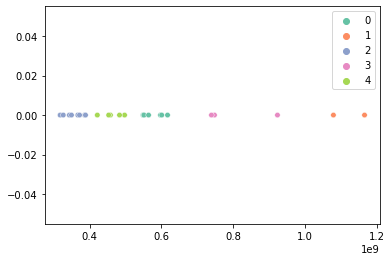

In [92]:
house_val = []
house_knn = []
for name in gu:
    val = temp[temp["gu_name"] == name]
    result = val["cost"].mean()
#     print(result)
    house_val.append(result)
    house_knn.append([result, 0])




# 군집의 갯수 5
kmean_house = KMeans(n_clusters=5)
kmean_house.fit(house_knn)

# 군집의 중심 좌표
center_house = kmean_house.cluster_centers_
lable_house = kmean_house.labels_

sns.scatterplot(x= house_val, y = [0 for _ in range(len(house_val))], hue = lable_house, s = 30, palette="Set2");

In [93]:
cnt = 0
houses = []
for name in gu:
#     print("%s는 %f 포인트로 :: %d번 군집" %(name, happy_val[cnt], lable_happy[cnt]))
    if lable_house[cnt] == 4:
        num = 2
    elif lable_house[cnt] == 0:
        num = 3
    elif lable_house[cnt] == 3:
        num = 4
    elif lable_house[cnt] == 1:
        num = 5
    else:
        num = 1
    
    houses.append([name, house_val[cnt], num])
    cnt += 1

In [94]:
house = pd.DataFrame(houses, columns=["gu", "house price avg", "house tier"])
house.to_csv("집값티어.csv")

## 인구이동

In [3]:
ads = pd.read_csv("seoul_population_in_out.csv")

In [4]:
ads

,Date,Gu,final_num
0,2015.01,서울특별시,"-3,055"
1,2015.01,종로구,-280
2,2015.01,중구,-136
3,2015.01,용산구,-282
4,2015.01,성동구,-252
...,...,...,...
1867,2020.12,관악구,-968
1868,2020.12,서초구,-367
1869,2020.12,강남구,-576
1870,2020.12,송파구,-636


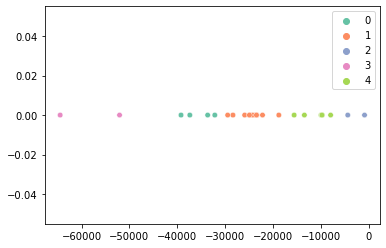

In [32]:
pop_val = []
pop_knn = []
for name in gu:
    val = ads[ads["Gu"] == name]
    result = val["final_num"]
    sums = 0
    for val in result.values:
        
        try:
            a = int(val)
        except:
            try:
                a = int(val.replace(',',''))
            except:
                a = 0
        sums += a

    pop_val.append(sums)
    pop_knn.append([sums, 0])




# 군집의 갯수 5
kmean_clu = KMeans(n_clusters=5)
kmean_clu.fit(pop_knn)

# 군집의 중심 좌표
center_house = kmean_clu.cluster_centers_
lable_house = kmean_clu.labels_

sns.scatterplot(x= pop_val, y = [0 for _ in range(len(pop_val))], hue = lable_house, s = 30, palette="Set2");

In [33]:
cnt = 0
pop = []
for name in gu:
    if lable_house[cnt] == 4:
        num = 2
    elif lable_house[cnt] == 1:
        num = 3
    elif lable_house[cnt] == 0:
        num = 4
    elif lable_house[cnt] == 3:
        num = 5
    else:
        num = 1
    
    pop.append([name, pop_val[cnt], num])
    cnt += 1

In [35]:
pop = pd.DataFrame(pop, columns=["gu", "인구변화량", "인구 tier"])
pop.to_csv("인구.csv")

## 세금 납부율

In [41]:
tax = pd.read_csv("지방세징수(구별)_2015_2019.csv")

In [42]:
tax

,gu_name,lat,long,tax_type,unit,2015,2016,2017,2018,2019
0,서울시,37.566789,126.978420,계,1000000,1.797237e+07,1.900708e+07,2.037381e+07,2.186052e+07,2.356822e+07
1,서울시,37.566789,126.978420,취득세,1000000,4.527595e+06,4.892109e+06,5.295211e+06,5.191737e+06,5.590806e+06
2,서울시,37.566789,126.978420,자동차세,1000000,1.068233e+06,1.094143e+06,1.083784e+06,1.275546e+06,9.401038e+05
3,서울시,37.566789,126.978420,재산세,1000000,2.005034e+06,2.131300e+06,2.288284e+06,2.497985e+06,2.841097e+06
4,서울시,37.566789,126.978420,지방소득세,1000000,4.230996e+06,4.189315e+06,4.639566e+06,5.494275e+06,5.805876e+06
...,...,...,...,...,...,...,...,...,...,...
151,강동구,37.530694,127.120623,취득세,1000000,1.465831e+05,1.749181e+05,2.546966e+05,1.801889e+05,2.930335e+05
152,강동구,37.530694,127.120623,자동차세,1000000,2.404760e+04,2.424289e+04,2.479360e+04,2.471289e+04,2.501422e+04
153,강동구,37.530694,127.120623,재산세,1000000,7.320233e+04,7.755162e+04,8.343393e+04,9.025543e+04,9.998201e+04
154,강동구,37.530694,127.120623,지방소득세,1000000,5.680057e+04,5.764624e+04,6.198499e+04,7.169764e+04,8.365494e+04


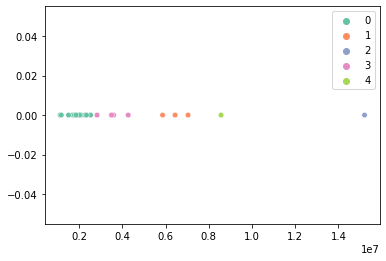

In [52]:
tax_val = []
tax_knn = []
for name in gu:
    val = tax[tax["gu_name"] == name]
    result = val[val["tax_type"] == "계"]
#     print(result)
    sums = 0
    for i in range(2015, 2020):
        a = result[str(i)].iloc[0]
        sums += a
    tax_val.append(sums)
    tax_knn.append([sums, 0])




# 군집의 갯수 5
kmean_tax = KMeans(n_clusters=5)
kmean_tax.fit(tax_knn)

# 군집의 중심 좌표
center_tax = kmean_tax.cluster_centers_
lable_tax = kmean_tax.labels_

sns.scatterplot(x= tax_val, y = [0 for _ in range(len(tax_val))], hue = lable_tax, s = 30, palette="Set2");

In [53]:
cnt = 0
tax = []
for name in gu:
    if lable_tax[cnt] == 4:
        num = 2
    elif lable_tax[cnt] == 1:
        num = 3
    elif lable_tax[cnt] == 3:
        num = 4
    elif lable_tax[cnt] == 0:
        num = 5
    else:
        num = 1
    
    tax.append([name, tax_val[cnt], num])
    cnt += 1

In [54]:
tax = pd.DataFrame(tax, columns=["gu", "세금 총액", "세금소득 tier"])
tax.to_csv("세금.csv")

In [55]:
tax

,gu,세금 총액,세금소득 tier
0,강남구,1.521076e+07,1
1,강동구,2.826840e+06,4
2,강북구,1.116934e+06,5
3,강서구,3.595182e+06,4
4,관악구,1.887715e+06,5
5,광진구,2.014935e+06,5
6,구로구,2.262319e+06,5
7,금천구,2.005735e+06,5
8,노원구,1.692841e+06,5
9,도봉구,1.169205e+06,5


## 최종 결과 값

In [5]:
final_point = [
67.75,
62.2,
63.85,
74.7,
67.1,
57.35,
67.1,
72.85,
63.6,
76.6,
50.85,
60.6,
59.7,
66.1,
60.15,
48.1,
57.85,
77.55,
57.85,
63.8,
59.2,
79.6,
58.7,
66.55,
70.1
]

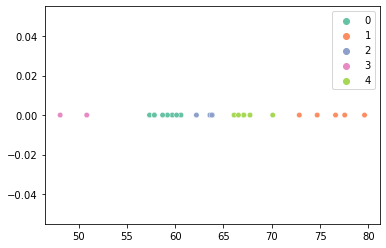

In [6]:
final_knn = []
for i in final_point:
    final_knn.append([i, 0])

# 군집의 갯수 5
kmean_f = KMeans(n_clusters=5)
kmean_f.fit(final_knn)

# 군집의 중심 좌표
center_f = kmean_f.cluster_centers_
lable_f = kmean_f.labels_

sns.scatterplot(x= final_point, y = [0 for _ in range(len(final_point))], hue = lable_f, s = 30, palette="Set2");

In [10]:
cnt = 0
tax = []
for name in gu:
    if lable_f[cnt] == 4:
        num = 2
    elif lable_f[cnt] == 2:
        num = 3
    elif lable_f[cnt] == 0:
        num = 4
    elif lable_f[cnt] == 3:
        num = 5
    else:
        num = 1
    
    tax.append([name, final_point[cnt], num])
    cnt += 1

In [11]:
tax = pd.DataFrame(tax, columns=["gu", "final_point", "rank_final"])
tax.to_csv("final.csv")

In [12]:
tax

,gu,final_point,rank_final
0,강남구,67.75,2
1,강동구,62.20,3
2,강북구,63.85,3
3,강서구,74.70,1
4,관악구,67.10,2
5,광진구,57.35,4
6,구로구,67.10,2
7,금천구,72.85,1
8,노원구,63.60,3
9,도봉구,76.60,1
